# Unit 5 - Financial Planning

In [1]:
# Initial imports

# We are going to use the new alpaca trading library `alpaca-py` as the `alpaca-trade-api` is now being deprecated
from    alpaca.data.historical import StockHistoricalDataClient
from    alpaca.data.requests   import StockBarsRequest
from    alpaca.data.timeframe  import TimeFrame

# Utility imports
from    MCForecastTools        import MCSimulation
from    dotenv                 import load_dotenv
from    dateutil.relativedelta import *
import  calendar
import  pandas as pd
import  hvplot.pandas
import  requests
import  os

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [2]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [4]:
# Fetch current BTC price
response = requests.get(
    url = btc_url
)

# Check for API call errors
response.raise_for_status()

# Retrieve the price
btc_price = response.json()["data"]["1"]["quotes"]["USD"]["price"]
btc_price

19422.74

In [5]:
# Fetch current ETH price
response = requests.get(
    url = eth_url
)
# Check for API call errors
response.raise_for_status()

# Retrieve the price
eth_price = response.json()["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

1317.08

In [6]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The total wallet value is ${(my_eth_value + my_btc_value):0.2f}")

The current value of your 1.2 BTC is $23307.29
The current value of your 5.3 ETH is $6980.52
The total wallet value is $30287.81


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Load .env enviroment variables
load_dotenv()

True

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA-API-KEY-ID")
alpaca_secret_key = os.getenv("APCA-API-SECRET-KEY")
if not(alpaca_api_key) or not(alpaca_secret_key):
    print("Failed to load API credentials")


In [10]:
# Create the Alpaca API object
# Instantiate a client object for historical data
client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)
client

In [11]:
# Format current date as ISO format
from_date = pd.to_datetime(pd.Timestamp.today(tz="America/New_York"))

# Let's make it Thursday last week at 4pm to ensure it is a trading day
from_date  = from_date + relativedelta(
    weekday= calendar.THURSDAY, 
    weeks  = -1, 
    hour   = 16, 
    minute = 0, 
    second = 0
)
from_date


Timestamp('2022-10-13 16:00:00.700221-0400', tz='America/New_York')

In [12]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
# timeframe = "1Day"
timeframe = TimeFrame.Day
timeframe


In [13]:
# Get current closing prices for SPY and AGG
# Request bar data for the tickers using the new alpaca API
request_params = StockBarsRequest(
    symbol_or_symbols   = tickers,
    timeframe           = timeframe,
    start               = from_date
)

bars = client.get_stock_bars(request_params)
bars
investments_df = bars.df
investments_df

open    high     low   close       volume  \
symbol timestamp                                                                
AGG    2022-10-14 04:00:00+00:00   95.63   95.63   94.61   94.66    8567937.0   
SPY    2022-10-14 04:00:00+00:00  368.54  370.26  356.96  357.63  122920585.0   

                                  trade_count        vwap  
symbol timestamp                                           
AGG    2022-10-14 04:00:00+00:00      22665.0   94.776094  
SPY    2022-10-14 04:00:00+00:00     818595.0  361.365272

In [14]:
# Retrieve closing prices for each stock
agg_close_price = investments_df.loc[("AGG")].close.values[0]
spy_close_price = investments_df.loc[("SPY")].close.values[0]
display(agg_close_price)
display(spy_close_price)

94.66

357.63

In [15]:
# Reorganize the DataFrame
# Separate ticker data
agg_df = investments_df.loc["AGG"]
spy_df = investments_df.loc["SPY"]
display(agg_df.head())
display(agg_df.head())

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([agg_df, spy_df], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
portfolio_df.head()

open   high    low  close     volume  trade_count  \
timestamp                                                                       
2022-10-14 04:00:00+00:00  95.63  95.63  94.61  94.66  8567937.0      22665.0   

                                vwap  
timestamp                             
2022-10-14 04:00:00+00:00  94.776094

open   high    low  close     volume  trade_count  \
timestamp                                                                       
2022-10-14 04:00:00+00:00  95.63  95.63  94.61  94.66  8567937.0      22665.0   

                                vwap  
timestamp                             
2022-10-14 04:00:00+00:00  94.776094

AGG                                              \
                            open   high    low  close     volume trade_count   
timestamp                                                                      
2022-10-14 04:00:00+00:00  95.63  95.63  94.61  94.66  8567937.0     22665.0   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-10-14 04:00:00+00:00  94.776094  368.54  370.26  356.96  357.63   

                                                                
                                volume trade_count        vwap  
timestamp                                                       
2022-10-14 04:00:00+00:00  122920585.0    818595.0  361.365272

In [16]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.66
Current SPY closing price: $357.63


In [17]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The total value of your shares is ${(my_spy_value + my_agg_value):0.2f} ")

The current value of your 50 SPY shares is $17881.50
The current value of your 200 AGG shares is $18932.00
The total value of your shares is $36813.50 


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
financial_assets = {
    "index"  : ["crypto", "shares"],
    "amount" : [(my_btc_value + my_eth_value), (my_spy_value + my_agg_value)]
}

# Create savings DataFrame
df_savings  = pd.DataFrame(
    data    = financial_assets, 
    index   = financial_assets["index"]
).drop(
    columns = ["index"]
)

# Display savings DataFrame
display(df_savings)

amount
crypto  30287.812
shares  36813.500

<AxesSubplot:ylabel='amount'>

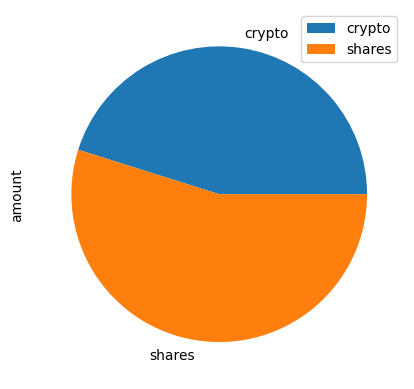

In [19]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached your financial goal of saving ${emergency_fund}.")
else:
    print(f"You have not yet reached your financial goal of ${emergency_fund}, you have a shortfall of ${(emergency_fund - total_savings):0.2f}.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
end_date = pd.to_datetime(
    pd.Timestamp.now(tz="America/New_York")
)
# Let's make it Friday last week at 3pm to ensure it is a trading day
end_date   = end_date + relativedelta(
    weekday= calendar.FRIDAY, 
    weeks  = -1, 
    hour   = 15, 
    minute = 0, 
    second = 0
)

# Set start date to 5 years prior to end_date also on a Friday at 3pm 
start_date = end_date + relativedelta(
    weekday=calendar.FRIDAY,
    years = -5
)

print(end_date)
print(start_date)

2022-10-14 15:00:00.751493-04:00
2017-10-20 15:00:00.751493-04:00


In [22]:
# Get 5 years' worth of historical data for SPY and AGG
request_params = StockBarsRequest(
    symbol_or_symbols   = tickers,
    timeframe           = timeframe,
    start               = start_date,
    end                 = end_date
)

bars = client.get_stock_bars(request_params)
investments_df   = bars.df
investments_df

open      high      low   close  \
symbol timestamp                                                      
AGG    2017-10-23 04:00:00+00:00  109.40  109.4700  109.360  109.42   
       2017-10-24 04:00:00+00:00  109.23  109.2900  109.170  109.19   
       2017-10-25 04:00:00+00:00  108.96  109.1300  108.950  109.12   
       2017-10-26 04:00:00+00:00  109.20  109.2290  108.980  109.00   
       2017-10-27 04:00:00+00:00  109.07  109.2600  109.035  109.24   
...                                  ...       ...      ...     ...   
SPY    2022-10-10 04:00:00+00:00  364.00  364.2100  357.670  360.02   
       2022-10-11 04:00:00+00:00  358.30  363.0300  355.710  357.74   
       2022-10-12 04:00:00+00:00  358.11  359.8179  356.300  356.56   
       2022-10-13 04:00:00+00:00  349.43  367.5100  348.110  365.97   
       2022-10-14 04:00:00+00:00  368.54  370.2600  356.960  357.63   

                                       volume  trade_count        vwap  
symbol timestamp                                                        
AGG    2017-10-23 04:00:00+00:00    2024767.0       9208.0  109.404970  
       2017-10-24 04:00:00+00:00    1722478.0       8486.0  109.230095  
       2017-10-25 04:00:00+00:00    2945420.0      12461.0  109.043379  
       2017-10-26 04:00:00+00:00    2163496.0       8113.0  109.051672  
       2017-10-27 04:00:00+00:00    1904955.0       8225.0  109.193461  
...                                       ...          ...         ...  
SPY    2022-10-10 04:00:00+00:00   75459157.0     593460.0  360.745547  
       2022-10-11 04:00:00+00:00   91448816.0     688092.0  358.717517  
       2022-10-12 04:00:00+00:00   76538522.0     549606.0  358.000408  
       2022-10-13 04:00:00+00:00  145171940.0    1098996.0  359.798331  
       2022-10-14 04:00:00+00:00  122920585.0     818595.0  361.365272  

[2508 rows x 7 columns]

In [23]:
# Reorganize the DataFrame
# Separate ticker data
agg_df = investments_df.loc["AGG"]
spy_df = investments_df.loc["SPY"]
display(agg_df.head())
display(agg_df.head())

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_df, spy_df], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

open     high      low   close     volume  \
timestamp                                                                
2017-10-23 04:00:00+00:00  109.40  109.470  109.360  109.42  2024767.0   
2017-10-24 04:00:00+00:00  109.23  109.290  109.170  109.19  1722478.0   
2017-10-25 04:00:00+00:00  108.96  109.130  108.950  109.12  2945420.0   
2017-10-26 04:00:00+00:00  109.20  109.229  108.980  109.00  2163496.0   
2017-10-27 04:00:00+00:00  109.07  109.260  109.035  109.24  1904955.0   

                           trade_count        vwap  
timestamp                                           
2017-10-23 04:00:00+00:00       9208.0  109.404970  
2017-10-24 04:00:00+00:00       8486.0  109.230095  
2017-10-25 04:00:00+00:00      12461.0  109.043379  
2017-10-26 04:00:00+00:00       8113.0  109.051672  
2017-10-27 04:00:00+00:00       8225.0  109.193461

open     high      low   close     volume  \
timestamp                                                                
2017-10-23 04:00:00+00:00  109.40  109.470  109.360  109.42  2024767.0   
2017-10-24 04:00:00+00:00  109.23  109.290  109.170  109.19  1722478.0   
2017-10-25 04:00:00+00:00  108.96  109.130  108.950  109.12  2945420.0   
2017-10-26 04:00:00+00:00  109.20  109.229  108.980  109.00  2163496.0   
2017-10-27 04:00:00+00:00  109.07  109.260  109.035  109.24  1904955.0   

                           trade_count        vwap  
timestamp                                           
2017-10-23 04:00:00+00:00       9208.0  109.404970  
2017-10-24 04:00:00+00:00       8486.0  109.230095  
2017-10-25 04:00:00+00:00      12461.0  109.043379  
2017-10-26 04:00:00+00:00       8113.0  109.051672  
2017-10-27 04:00:00+00:00       8225.0  109.193461

AGG                                       \
                             open     high      low   close     volume   
timestamp                                                                
2017-10-23 04:00:00+00:00  109.40  109.470  109.360  109.42  2024767.0   
2017-10-24 04:00:00+00:00  109.23  109.290  109.170  109.19  1722478.0   
2017-10-25 04:00:00+00:00  108.96  109.130  108.950  109.12  2945420.0   
2017-10-26 04:00:00+00:00  109.20  109.229  108.980  109.00  2163496.0   
2017-10-27 04:00:00+00:00  109.07  109.260  109.035  109.24  1904955.0   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-10-23 04:00:00+00:00      9208.0  109.404970  257.51  257.51  256.0200   
2017-10-24 04:00:00+00:00      8486.0  109.230095  256.56  256.83  256.1500   
2017-10-25 04:00:00+00:00     12461.0  109.043379  256.23  256.31  254.0000   
2017-10-26 04:00:00+00:00      8113.0  109.051672  256.01  256.30  255.4800   
2017-10-27 04:00:00+00:00      8225.0  109.193461  256.47  257.89  255.6254   

                                                                        
                            close       volume trade_count        vwap  
timestamp                                                               
2017-10-23 04:00:00+00:00  256.11   64001716.0    196938.0  256.704266  
2017-10-24 04:00:00+00:00  256.56   69886571.0    193871.0  256.490281  
2017-10-25 04:00:00+00:00  255.29  103740803.0    318607.0  255.251326  
2017-10-26 04:00:00+00:00  255.62   71854886.0    178431.0  255.755127  
2017-10-27 04:00:00+00:00  257.71   85964044.0    230991.0  257.220580

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
weights  = [0.40, 0.60]
years    = 30
MC_sim   = MCSimulation(
    portfolio_data   = df_stock_data,
    weights          = weights,
    num_simulation   = num_sims,
    num_trading_days = 252 * years
)

In [25]:
# Printing the simulation input data
MC_sim.portfolio_data.head()

AGG                                       \
                             open     high      low   close     volume   
timestamp                                                                
2017-10-23 04:00:00+00:00  109.40  109.470  109.360  109.42  2024767.0   
2017-10-24 04:00:00+00:00  109.23  109.290  109.170  109.19  1722478.0   
2017-10-25 04:00:00+00:00  108.96  109.130  108.950  109.12  2945420.0   
2017-10-26 04:00:00+00:00  109.20  109.229  108.980  109.00  2163496.0   
2017-10-27 04:00:00+00:00  109.07  109.260  109.035  109.24  1904955.0   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-10-23 04:00:00+00:00      9208.0  109.404970          NaN  257.51   
2017-10-24 04:00:00+00:00      8486.0  109.230095    -0.002102  256.56   
2017-10-25 04:00:00+00:00     12461.0  109.043379    -0.000641  256.23   
2017-10-26 04:00:00+00:00      8113.0  109.051672    -0.001100  256.01   
2017-10-27 04:00:00+00:00      8225.0  109.193461     0.002202  256.47   

                                                                              \
                             high       low   close       volume trade_count   
timestamp                                                                      
2017-10-23 04:00:00+00:00  257.51  256.0200  256.11   64001716.0    196938.0   
2017-10-24 04:00:00+00:00  256.83  256.1500  256.56   69886571.0    193871.0   
2017-10-25 04:00:00+00:00  256.31  254.0000  255.29  103740803.0    318607.0   
2017-10-26 04:00:00+00:00  256.30  255.4800  255.62   71854886.0    178431.0   
2017-10-27 04:00:00+00:00  257.89  255.6254  257.71   85964044.0    230991.0   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-23 04:00:00+00:00  256.704266          NaN  
2017-10-24 04:00:00+00:00  256.490281     0.001757  
2017-10-25 04:00:00+00:00  255.251326    -0.004950  
2017-10-26 04:00:00+00:00  255.755127     0.001293  
2017-10-27 04:00:00+00:00  257.220580     0.008176

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/gadam/projects/fintech/fintech_assessment_04/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.991997  0.992267  0.997470  1.017769  1.005598  1.002717  1.013021   
2     0.997343  1.000046  0.999829  1.016809  1.005845  0.995615  1.010745   
3     1.000471  1.000035  0.998469  1.003435  1.003727  0.976795  1.010449   
4     1.009803  1.018780  0.993849  1.012265  0.992735  0.962086  1.017178   
...        ...       ...       ...       ...       ...       ...       ...   
7556  1.195927  3.760270  2.717679  0.762239  1.404970  3.720074  6.401973   
7557  1.201342  3.757862  2.711402  0.761789  1.398733  3.728201  6.415876   
7558  1.187584  3.764817  2.724935  0.757660  1.387898  3.760233  6.316162   
7559  1.197254  3.795183  2.696263  0.752242  1.387095  3.764770  6.314880   
7560  1.193098  3.781288  2.750859  0.753190  1.390676  3.758029  6.361104   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.006663  0.996718  1.002798  ...  0.999736  0.997898  1.002640   
2     1.007885  0.997684  1.007404  ...  0.992234  0.998717  0.998363   
3     1.020385  0.998244  1.001641  ...  0.980318  0.991576  0.987687   
4     1.012721  0.997298  0.984502  ...  0.980943  0.985211  0.981973   
...        ...       ...       ...  ...       ...       ...       ...   
7556  2.818915  3.817354  3.333914  ...  2.647330  2.377482  2.589102   
7557  2.825993  3.826298  3.343364  ...  2.676782  2.397177  2.554249   
7558  2.842793  3.795472  3.313851  ...  2.676940  2.395679  2.568581   
7559  2.852281  3.816125  3.291523  ...  2.686017  2.404217  2.595575   
7560  2.838006  3.834242  3.277014  ...  2.698603  2.380022  2.633429   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002193  0.993517  1.008082  1.003791  0.993107  1.003296  1.005791  
2     1.018219  0.990230  1.001858  1.012513  0.992421  0.982510  1.008537  
3     1.007244  0.999310  0.993295  1.024804  0.995972  0.983508  1.006207  
4     0.997471  1.000181  0.995464  1.030584  0.985972  0.986117  1.004704  
...        ...       ...       ...       ...       ...       ...       ...  
7556  1.219461  1.829175  3.379426  3.630474  0.852028  2.801026  1.499895  
7557  1.207153  1.836756  3.354253  3.607599  0.854156  2.777854  1.493756  
7558  1.202802  1.837891  3.360366  3.637832  0.861255  2.771537  1.499151  
7559  1.208490  1.826689  3.317029  3.618804  0.861743  2.779416  1.498119  
7560  1.201695  1.842614  3.302370  3.616723  0.858212  2.759552  1.505405  

[7561 rows x 500 columns]

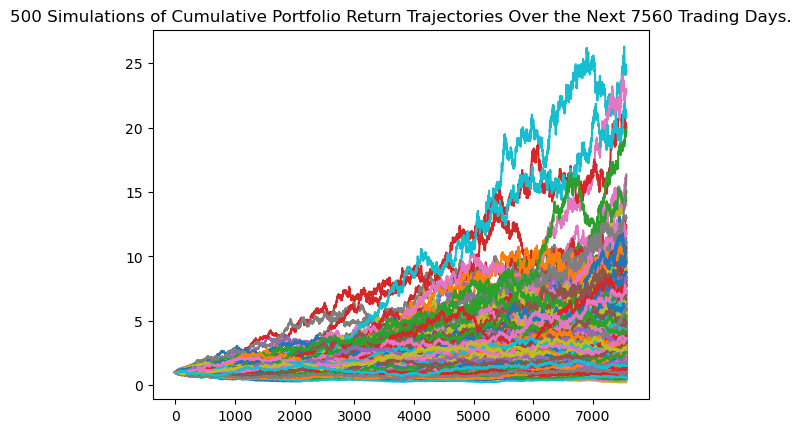

In [27]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

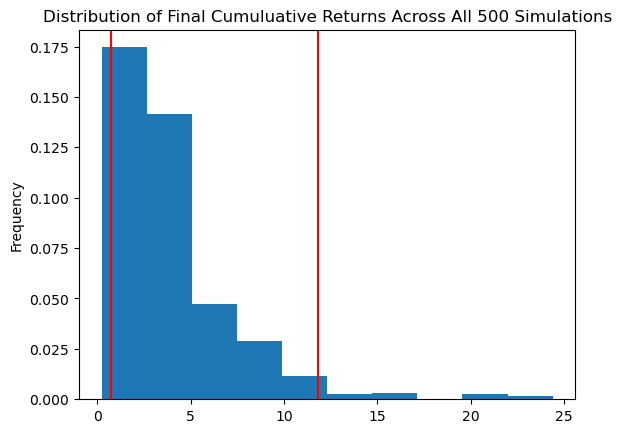

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.922620
std               3.283799
min               0.226455
25%               1.817164
50%               2.998412
75%               4.853072
max              24.390538
95% CI Lower      0.728054
95% CI Upper     11.842469
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl["95% CI Lower"] * initial_investment, 2)
ci_upper = round(tbl["95% CI Upper"] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $14561.07 and $236849.37


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl["95% CI Lower"] * initial_investment, 2)
ci_upper = round(tbl["95% CI Upper"] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $21841.61 and $355274.06


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
years = 5

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/gadam/projects/fintech/fintech_assessment_04/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1          2         3         4         5         6    \
0     1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.990283  1.000153   0.990712  0.999130  1.005117  1.008962  0.992006   
2     0.997729  0.997783   0.983532  0.993350  1.013017  1.012586  0.979725   
3     1.001370  1.006192   0.989954  1.004536  1.007173  1.000993  0.986356   
4     1.011838  1.010774   0.998348  0.995245  1.016431  0.999740  1.000816   
...        ...       ...        ...       ...       ...       ...       ...   
7556  3.110511  3.161457  10.255190  5.260415  5.611464  1.854154  3.862175   
7557  3.086049  3.226794  10.380743  5.284316  5.633621  1.853711  3.813318   
7558  3.092547  3.221701  10.507067  5.277416  5.625925  1.852177  3.825508   
7559  3.068690  3.203510  10.460299  5.209859  5.495150  1.874672  3.818453   
7560  3.064716  3.223088  10.664596  5.173622  5.521286  1.908848  3.823620   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.986163  1.009950  1.006089  ...  1.002991  1.005163  1.009063   
2     0.997346  1.008398  1.014586  ...  0.984909  1.006961  1.016716   
3     0.997688  1.009766  1.021631  ...  0.979383  1.009741  1.032413   
4     1.006096  0.991983  1.020548  ...  0.994169  1.010800  1.034833   
...        ...       ...       ...  ...       ...       ...       ...   
7556  3.814317  3.978502  2.736771  ...  1.488018  5.041161  3.897031   
7557  3.817740  3.994403  2.729100  ...  1.482242  5.000051  3.867371   
7558  3.818235  3.964298  2.757105  ...  1.485712  5.016685  3.845320   
7559  3.813902  3.996080  2.779206  ...  1.476934  4.970399  3.832999   
7560  3.840113  3.979308  2.774261  ...  1.478548  5.006248  3.836307   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002088  1.000019  1.003937  0.996048  1.001421  1.005095  1.002214  
2     1.004951  0.999141  1.014634  1.000323  0.996079  1.002243  0.990361  
3     0.998986  1.001189  1.006225  0.995028  0.992736  1.009082  0.990783  
4     0.990475  1.022996  1.013747  0.993640  1.000156  1.007000  0.986783  
...        ...       ...       ...       ...       ...       ...       ...  
7556  0.813897  0.737707  3.472181  3.253165  0.954534  5.472930  3.737112  
7557  0.811063  0.737791  3.463602  3.246946  0.953985  5.423265  3.714583  
7558  0.820647  0.739762  3.453747  3.248005  0.951051  5.371873  3.684548  
7559  0.817555  0.733340  3.440297  3.266783  0.959490  5.439080  3.713834  
7560  0.817684  0.740843  3.415252  3.255351  0.960294  5.468021  3.687424  

[7561 rows x 500 columns]

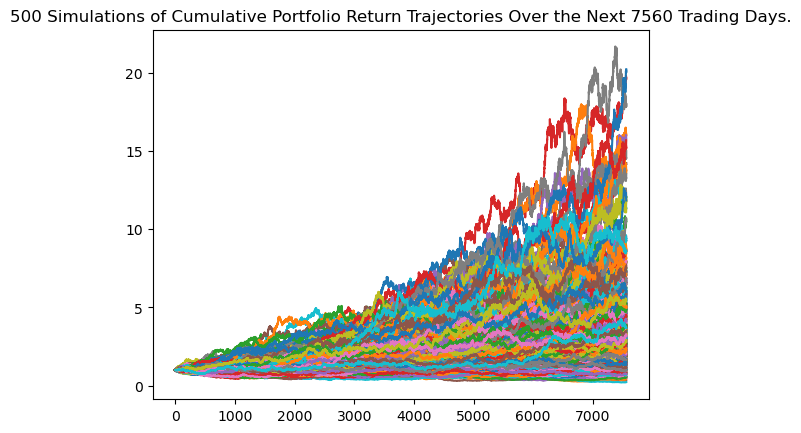

In [34]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

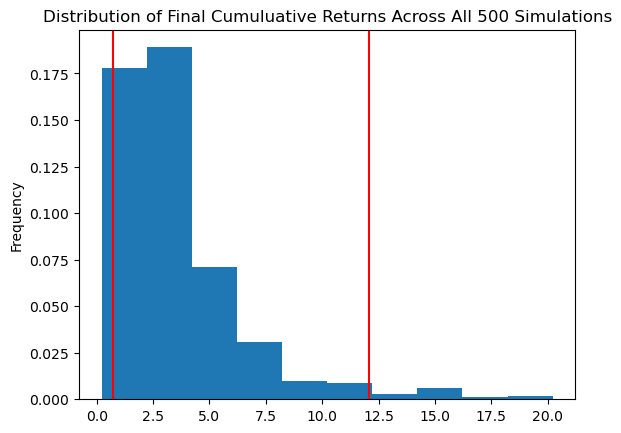

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.570378
std               2.933412
min               0.220977
25%               1.709342
50%               2.692973
75%               4.421979
max              20.212201
95% CI Lower      0.708197
95% CI Upper     12.087980
Name: 7560, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl["95% CI Lower"] * initial_investment, 2)
ci_upper_five = round(tbl["95% CI Upper"] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within the range of $42491.8 and $725278.79


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
years = 10

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/gadam/projects/fintech/fintech_assessment_04/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996901  1.004668  0.998824  0.999291  0.997114  0.977624  0.999049   
2     1.002031  0.994759  0.992277  1.010840  1.015018  0.973263  1.000605   
3     0.990472  1.009154  1.002795  1.024422  1.010933  0.975031  1.000903   
4     0.997938  1.010446  1.004141  1.024506  1.010019  0.959457  0.988363   
...        ...       ...       ...       ...       ...       ...       ...   
7556  1.692452  1.668289  2.469929  3.435085  5.932686  1.561416  0.913002   
7557  1.687821  1.673579  2.478777  3.401893  5.956929  1.548329  0.914438   
7558  1.672554  1.654596  2.427868  3.366730  5.895467  1.530980  0.912608   
7559  1.657690  1.676573  2.407206  3.369446  5.925677  1.538285  0.928215   
7560  1.638788  1.665598  2.406637  3.388731  5.957701  1.545645  0.928490   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000086  1.006584  0.995914  ...  1.002510  1.017908  1.005960   
2     0.997455  1.018693  0.992563  ...  1.014414  1.023830  0.991142   
3     0.991544  1.013025  0.979259  ...  1.002616  1.034532  0.983699   
4     1.004527  1.024599  0.969087  ...  1.010047  1.027227  0.991294   
...        ...       ...       ...  ...       ...       ...       ...   
7556  0.710183  1.480512  2.511462  ...  4.921850  2.565988  3.218618   
7557  0.712527  1.458691  2.483955  ...  4.891651  2.566357  3.236251   
7558  0.710868  1.480759  2.483118  ...  4.883295  2.600235  3.229329   
7559  0.710205  1.479780  2.511703  ...  4.941979  2.594928  3.226639   
7560  0.703482  1.484183  2.534194  ...  4.981436  2.617701  3.231010   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.995244  0.996207  1.006523  1.012959  0.992896  1.013297  1.001574  
2     0.995293  0.983904  0.991535  1.011921  0.989137  1.011877  1.007351  
3     1.000894  0.982236  0.993434  1.004160  0.982153  0.996853  0.997501  
4     0.987682  0.975462  1.001370  1.014678  0.996492  0.993644  1.000670  
...        ...       ...       ...       ...       ...       ...       ...  
7556  1.476787  4.536733  1.251294  2.696378  0.974677  1.548722  5.285992  
7557  1.484714  4.487119  1.242412  2.711264  0.987459  1.537969  5.275103  
7558  1.478139  4.493720  1.214478  2.710708  0.987863  1.553438  5.279036  
7559  1.476202  4.492406  1.208641  2.751660  0.979216  1.552383  5.236973  
7560  1.473499  4.518845  1.219804  2.767349  0.977216  1.560891  5.297719  

[7561 rows x 500 columns]

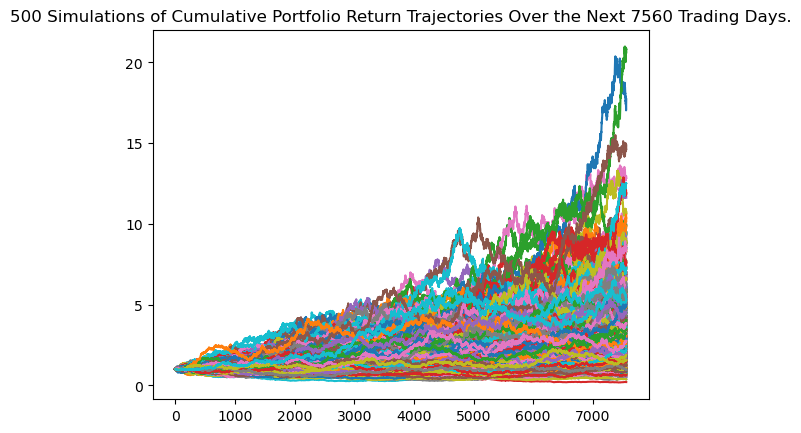

In [40]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

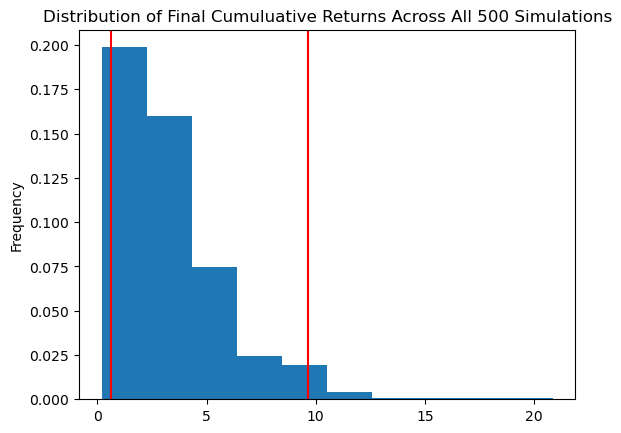

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.422558
std               2.558043
min               0.204990
25%               1.618272
50%               2.684388
75%               4.513002
max              20.834815
95% CI Lower      0.632765
95% CI Upper      9.627659
Name: 7560, dtype: float64


In [43]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl["95% CI Lower"] * initial_investment, 2)
ci_upper_ten = round(tbl["95% CI Upper"] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within the range of $37965.88 and $577659.52


In [44]:
scenarios = {
    "years"    : [5, 10, 30],
    "lower CI" : [ci_lower_five, ci_lower_ten, ci_lower],
    "upper CI" : [ci_upper_five, ci_upper_ten, ci_upper]
}
df_scenarios   = pd.DataFrame(
    data       = scenarios, 
    index      = scenarios["years"]
).drop(columns = ["years"])
df_scenarios

lower CI   upper CI
5   42491.80  725278.79
10  37965.88  577659.52
30  21841.61  355274.06

In [45]:
# Plot the scenarios
df_scenarios.hvplot.bar().opts(
    xlabel     = "Years",
    ylabel     = "Range",
    yformatter = "%.0f", 
    title      = "Scenario forecast of lower and upper range of returns for 5, 10 and 30 year timeframes"
)

:Bars   [index,Variable]   (value)

From the chart above, a 30-year timeframe with an initial investment of between `$20,000` to `$30,000` is likely to yield a lower range of returns when compared with increasing the the initial investment amount by 50% and investing over a shorter timeframe like `5` or `10` years.

## Repeating the above scenarios with a higher stock than bond ratio

In [46]:
weights = [0.60, 0.40]
years   = 30

In [47]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/gadam/projects/fintech/fintech_assessment_04/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.017282  0.999477  0.991540  0.991276  1.008870  0.989856  1.001089   
2     1.022666  1.008881  0.999872  0.997062  1.016299  0.991273  1.002506   
3     1.007618  1.015663  1.004528  1.002646  1.012022  0.978782  1.010776   
4     1.016201  1.016739  0.994363  0.997292  1.007859  0.973185  1.000368   
...        ...       ...       ...       ...       ...       ...       ...   
7556  2.693463  7.403475  7.026603  2.944482  1.119278  3.079155  0.967646   
7557  2.699433  7.426966  7.072601  2.948896  1.127019  3.115894  0.972089   
7558  2.711315  7.481163  7.127389  2.958829  1.132074  3.125730  0.961875   
7559  2.691309  7.490537  7.199666  2.963516  1.138952  3.096955  0.970162   
7560  2.701028  7.493582  7.204759  2.949965  1.137917  3.085300  0.967878   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.001519  1.006383  0.997225  ...  1.003035  1.001620  0.998369   
2     1.002825  1.014347  0.999664  ...  1.006420  1.019812  1.012468   
3     1.001096  1.017831  0.995152  ...  1.004087  1.010169  1.023590   
4     1.011991  1.022325  1.010176  ...  1.006452  1.018420  1.012152   
...        ...       ...       ...  ...       ...       ...       ...   
7556  3.998238  4.149967  2.568907  ...  2.609046  1.793625  3.662236   
7557  4.006820  4.062108  2.565700  ...  2.586379  1.788944  3.670075   
7558  4.032418  4.077906  2.542006  ...  2.622104  1.811342  3.665887   
7559  4.024581  4.066235  2.539204  ...  2.651552  1.810031  3.678330   
7560  4.026987  4.066347  2.597606  ...  2.664948  1.803892  3.691740   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.990660  1.009004  1.003864  0.995885  1.006602  0.996380  1.001365  
2     0.989650  1.009917  1.014482  1.005172  1.021015  0.993564  1.013665  
3     0.993113  1.019386  1.026646  1.010911  1.026664  0.972945  1.013254  
4     0.986408  1.013285  1.047218  1.022229  1.014725  0.973129  1.001049  
...        ...       ...       ...       ...       ...       ...       ...  
7556  7.180453  2.281949  2.433327  1.089781  2.603965  3.084418  2.986421  
7557  7.142069  2.287864  2.459316  1.084764  2.626412  3.078461  2.969325  
7558  7.090187  2.259785  2.489319  1.094986  2.616496  3.153502  2.994488  
7559  7.125838  2.261126  2.495370  1.097202  2.610145  3.177685  2.955403  
7560  7.118307  2.255693  2.539630  1.101472  2.595254  3.203682  2.948952  

[7561 rows x 500 columns]

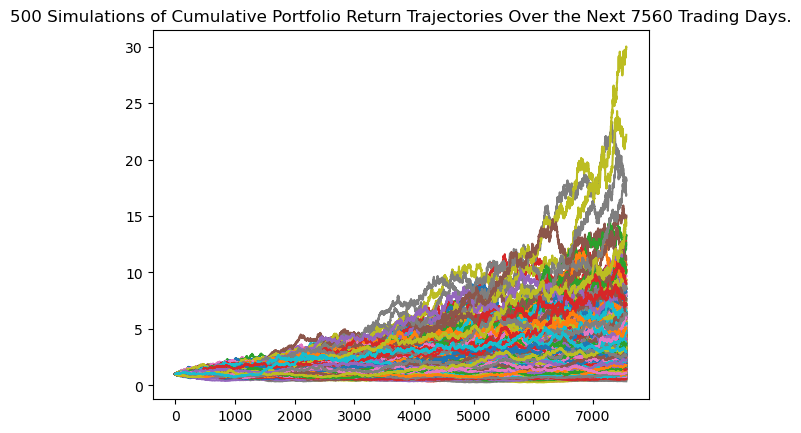

In [48]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

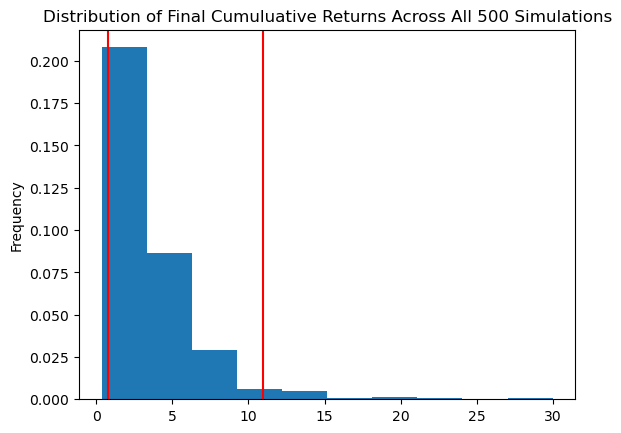

In [49]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.607325
std               3.052469
min               0.359645
25%               1.752338
50%               2.762428
75%               4.427525
max              29.973841
95% CI Lower      0.750769
95% CI Upper     10.970280
Name: 7560, dtype: float64


In [51]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_bond_shares_30 = round(tbl["95% CI Lower"] * initial_investment, 2)
ci_upper_bond_shares_30 = round(tbl["95% CI Upper"] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_bond_shares_30} and ${ci_upper_bond_shares_30}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within the range of $22523.07 and $329108.39


Comparing the two 30 year portfolios

In [52]:
bond_shares_scenarios = {
    "ratio"    : ["60% Stock 40% Bond", "40% Stock 60% Bond"],
    "lower CI" : [ci_lower, ci_lower_bond_shares_30],
    "upper CI" : [ci_upper, ci_upper_bond_shares_30]
}
df_bond_shares_scenarios = pd.DataFrame(
    data       = bond_shares_scenarios, 
    index      = bond_shares_scenarios["ratio"]
).drop(columns = ["ratio"])
df_bond_shares_scenarios

lower CI   upper CI
60% Stock 40% Bond  21841.61  355274.06
40% Stock 60% Bond  22523.07  329108.39

In [53]:
# Plot the scenarios
df_bond_shares_scenarios.hvplot.bar().opts(
    xlabel     = "Ratio",
    ylabel     = "Range",
    yformatter = "%.0f", 
    title      = "Scenario forecast for different ratios of bond vs shares"
)

:Bars   [index,Variable]   (value)

5 year simulation with 40% stock and 60% bond

In [54]:
years = 5
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/gadam/projects/fintech/fintech_assessment_04/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.991451  1.018654  0.999046  1.002281  1.012384  1.004463  1.003517   
2     0.995938  1.011192  1.015375  0.995862  1.011464  1.005316  0.983021   
3     0.994852  1.040505  1.027871  0.997022  1.001682  0.997189  0.969088   
4     1.000470  1.043006  1.018989  0.971745  0.999744  0.983818  0.968544   
...        ...       ...       ...       ...       ...       ...       ...   
7556  1.072719  0.957978  3.504892  6.592945  0.988484  1.506076  2.424572   
7557  1.080183  0.958035  3.557615  6.593495  0.991281  1.508814  2.432609   
7558  1.083677  0.953588  3.573738  6.550955  1.003767  1.488672  2.433661   
7559  1.077465  0.957857  3.580607  6.463990  1.004962  1.494747  2.436025   
7560  1.059763  0.961425  3.564138  6.369861  1.013809  1.505510  2.420135   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.011262  1.002320  1.009607  ...  0.994682  0.985734  0.989120   
2     1.017155  1.005495  1.003657  ...  0.997589  0.989107  0.982417   
3     1.016625  1.005743  1.006973  ...  0.988694  1.003581  0.991065   
4     1.003263  0.991695  1.008118  ...  0.986949  1.014133  1.001912   
...        ...       ...       ...  ...       ...       ...       ...   
7556  5.263092  1.444338  1.416826  ...  9.786003  0.855785  4.335351   
7557  5.248898  1.433311  1.413134  ...  9.750443  0.857496  4.287960   
7558  5.260465  1.432288  1.415033  ...  9.863103  0.862237  4.304931   
7559  5.225971  1.439299  1.426813  ...  9.891666  0.870538  4.176055   
7560  5.246987  1.448294  1.431846  ...  9.987008  0.874279  4.149736   

            493       494       495       496       497       498       499  
0      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1      0.994873  0.989581  0.996592  0.988937  0.993015  0.997840  1.006770  
2      0.995310  0.991849  1.004851  0.978909  1.000008  0.999181  1.008973  
3      1.006681  1.001607  1.016987  0.971136  0.989895  1.001481  1.006138  
4      1.011031  1.005269  0.998942  0.986400  0.992625  1.010328  1.009059  
...         ...       ...       ...       ...       ...       ...       ...  
7556  16.652519  1.015398  1.757529  8.602744  3.572512  0.659501  4.494793  
7557  16.693960  1.011587  1.766009  8.533327  3.601662  0.665448  4.481795  
7558  16.580175  1.007131  1.754685  8.511675  3.596971  0.657857  4.467767  
7559  16.674260  1.018438  1.754695  8.569071  3.543686  0.653419  4.500301  
7560  16.659189  1.019614  1.766718  8.569303  3.506898  0.659896  4.493019  

[7561 rows x 500 columns]

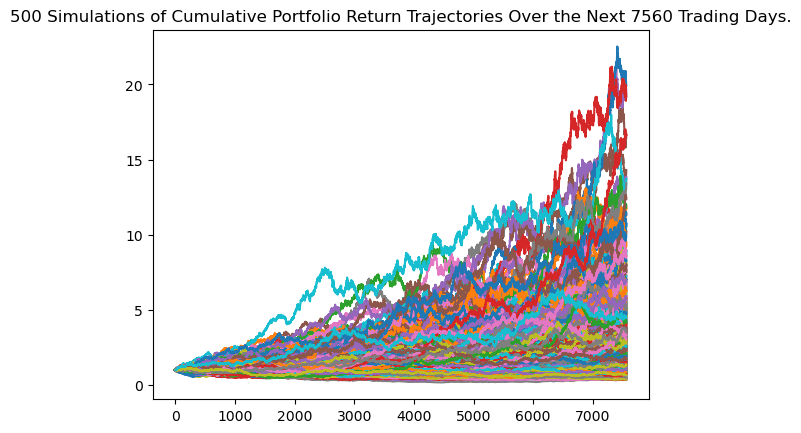

In [55]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

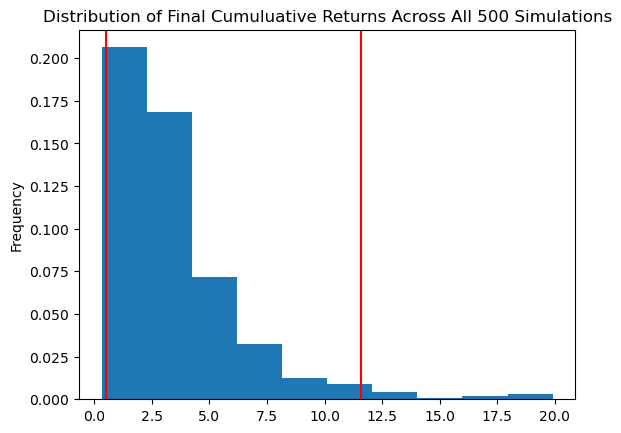

In [56]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.504075
std               2.875937
min               0.323843
25%               1.714505
50%               2.680690
75%               4.418967
max              19.905279
95% CI Lower      0.527289
95% CI Upper     11.577398
Name: 7560, dtype: float64


In [58]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_bond_shares_5 = round(tbl["95% CI Lower"] * initial_investment, 2)
ci_upper_bond_shares_5 = round(tbl["95% CI Upper"] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_bond_shares_5} and ${ci_upper_bond_shares_5}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within the range of $15818.66 and $347321.94


Simulating 10 years at 60% bonds and 40% stocks

In [59]:
years = 10
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/gadam/projects/fintech/fintech_assessment_04/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.986757  0.998850  0.998831  1.014571  1.008352  1.011574  0.999215   
2     0.982452  1.001735  0.993566  1.021493  1.020745  1.017922  1.006606   
3     0.993432  1.010019  0.987584  1.012089  1.024322  1.007788  1.005661   
4     1.001417  1.000825  0.986717  1.014273  1.018205  0.998821  1.006917   
...        ...       ...       ...       ...       ...       ...       ...   
7556  2.876432  1.786152  2.006927  2.470395  4.467962  2.069995  2.953805   
7557  2.881363  1.798529  2.010552  2.478283  4.474147  2.079933  2.956966   
7558  2.875451  1.760845  1.989466  2.502582  4.438352  2.082515  2.954839   
7559  2.877408  1.739313  1.982111  2.501395  4.496960  2.086617  2.948566   
7560  2.889855  1.754291  1.998281  2.515722  4.440965  2.077856  2.961911   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.995757  0.996922  1.016601  ...  0.995313  1.010981  0.981825   
2     0.995907  1.000135  1.020446  ...  1.007747  1.022664  0.978987   
3     1.012933  1.000888  1.018275  ...  1.014092  1.030572  0.972965   
4     1.016497  0.998997  1.001802  ...  1.012777  1.038671  0.977450   
...        ...       ...       ...  ...       ...       ...       ...   
7556  4.284444  1.682323  5.479289  ...  3.718032  3.618415  3.346050   
7557  4.267784  1.683959  5.494279  ...  3.676328  3.644381  3.274345   
7558  4.251211  1.700937  5.505111  ...  3.647754  3.654507  3.270865   
7559  4.235444  1.721676  5.542884  ...  3.583875  3.675057  3.282744   
7560  4.248723  1.712924  5.532460  ...  3.576570  3.665349  3.230458   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.001660  1.004829  0.991819  1.004088  0.996956  0.995108  1.014373  
2     1.012399  1.004011  0.981543  1.002294  0.991469  0.997171  1.012127  
3     1.009663  1.017061  0.994020  0.993793  0.976869  1.020361  0.998960  
4     1.015493  1.010474  0.998318  1.009764  0.976881  1.022283  1.001358  
...        ...       ...       ...       ...       ...       ...       ...  
7556  5.024883  5.387009  1.494141  2.430765  4.368954  2.543524  4.695874  
7557  5.025014  5.379324  1.495600  2.431310  4.354845  2.545452  4.723699  
7558  4.999207  5.464206  1.495849  2.442391  4.397168  2.568289  4.697798  
7559  4.947336  5.496199  1.489116  2.476897  4.376010  2.547244  4.703152  
7560  4.885550  5.514443  1.493326  2.471999  4.398448  2.554213  4.773875  

[7561 rows x 500 columns]

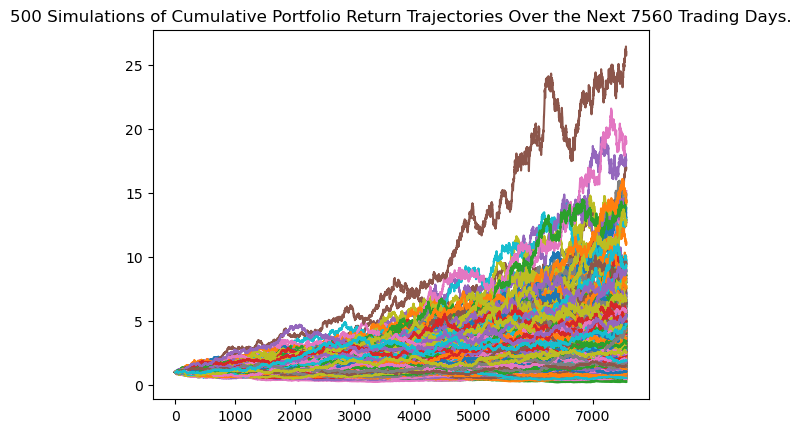

In [60]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

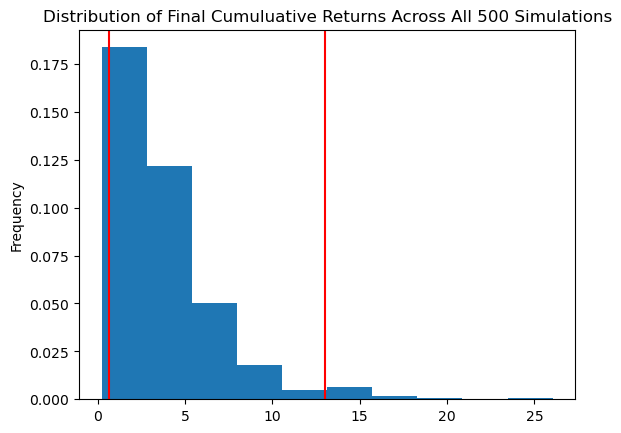

In [61]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.785448
std               3.064611
min               0.236613
25%               1.827122
50%               2.947430
75%               4.777326
max              26.039320
95% CI Lower      0.662414
95% CI Upper     13.006202
Name: 7560, dtype: float64


In [63]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_bond_shares_10 = round(tbl["95% CI Lower"] * initial_investment, 2)
ci_upper_bond_shares_10 = round(tbl["95% CI Upper"] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_bond_shares_10} and ${ci_upper_bond_shares_10}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within the range of $19872.41 and $390186.05


Let's compare the outcomes via a visual

In [64]:
# Build a dataframe for the 60/40 bond to shares forecast
bonds_60_shares_40 = {
    "years" : [5, 10, 30],
    "ratio" : ["60% Bonds / 40% Shares", "60% Bonds / 40% Shares", "60% Bonds / 40% Shares"],
    "lower CI" : [ci_lower_bond_shares_5, ci_lower_bond_shares_10, ci_lower_bond_shares_30],
    "upper CI" : [ci_upper_bond_shares_5, ci_upper_bond_shares_10, ci_upper_bond_shares_30]
}
df_bonds_60_shares_40 = pd.DataFrame(
    data = bonds_60_shares_40, 
    index = bonds_60_shares_40["years"]
).drop(columns = ["years"])
df_bonds_60_shares_40

ratio  lower CI   upper CI
5   60% Bonds / 40% Shares  15818.66  347321.94
10  60% Bonds / 40% Shares  19872.41  390186.05
30  60% Bonds / 40% Shares  22523.07  329108.39

In [65]:
# Build another dataframe for the 40/60 bond to shares forecast
df_bonds_40_shares_60 = df_scenarios
df_bonds_40_shares_60.insert(0, "ratio", ["40% Bonds / 60% Shares", "40% Bonds / 60% Shares", "40% Bonds / 60% Shares"])
df_bonds_40_shares_60

ratio  lower CI   upper CI
5   40% Bonds / 60% Shares  42491.80  725278.79
10  40% Bonds / 60% Shares  37965.88  577659.52
30  40% Bonds / 60% Shares  21841.61  355274.06

In [66]:
# Combine the two dataframes for visualisation
df_combined_scenarios = pd.concat([df_bonds_40_shares_60, df_bonds_60_shares_40], axis=0)
df_combined_scenarios

ratio  lower CI   upper CI
5   40% Bonds / 60% Shares  42491.80  725278.79
10  40% Bonds / 60% Shares  37965.88  577659.52
30  40% Bonds / 60% Shares  21841.61  355274.06
5   60% Bonds / 40% Shares  15818.66  347321.94
10  60% Bonds / 40% Shares  19872.41  390186.05
30  60% Bonds / 40% Shares  22523.07  329108.39

In [67]:
# Visualise the dataframe to compare
df_combined_scenarios.hvplot.bar(groupby = "ratio").opts(
    # xlabel="Ratio",
    # ylabel="Range",
    yformatter = "%.0f", 
    title      = "Scenario forecast for different ratios of bond vs shares"
)

:DynamicMap   [ratio]
   :Bars   [index,Variable]   (value)

From the above chart, we can see that increasing the percentage of bonds to be higher than shares (from 40% to 60%) would provide a worse outcome for credit union members across all timeframe horizons.